Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib

Prediction for molecule with descriptors 2.5 (Bala), 3 (HBA), 1 (HBD), 2.5 (LogP), 300 (MW) , 5 (RB) and 50 (TPSA) is class [2]

Confusion Matrix:
[[175  52  37]
 [  6 451  56]
 [  0  44 480]]

Training data vs. Prediction


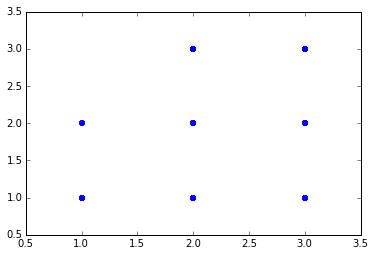

In [1]:
%pylab
%matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as Classifier
from sklearn.metrics import confusion_matrix
from rdkit import rdBase
from rdkit import RDConfig
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem.Descriptors import descList


# arranging data
df = pd.read_csv ('/home/chembl/notebooks/FabiansTests/bioactivity_5-ht2b.csv')
smi = df['canSMILES_desalted']
ms = map(str, smi)
aclass = df['ActivityClass']
clas = map(int, aclass)  


# calculate descriptors 
logp_list = []
for i in ms:
    logp = Descriptors.MolLogP(Chem.MolFromSmiles(i))
    logp_list.append(logp) 
tpsa_list = []
for i in ms:
    tpsa = Descriptors.TPSA(Chem.MolFromSmiles(i))
    tpsa_list.append(tpsa)
mw_list = []
for i in ms:
    mw = Descriptors.MolWt(Chem.MolFromSmiles(i))
    mw_list.append(mw)
rb_list = []
for i in ms:
    rb = Descriptors.NumRotatableBonds(Chem.MolFromSmiles(i))
    rb_list.append(rb)
hbd_list = []
for i in ms:
    hbd = Descriptors.NumHDonors(Chem.MolFromSmiles(i))
    hbd_list.append(hbd)
hba_list = []
for i in ms:
    hba = Descriptors.NumHAcceptors(Chem.MolFromSmiles(i))
    hba_list.append(hba)
bala_list = []
for i in ms:
    bala = Descriptors.BalabanJ(Chem.MolFromSmiles(i))
    bala_list.append(bala)
    
des = pd.DataFrame({'bala_list':bala_list,'hba_list':hba_list,'hbd_list':hbd_list,'logp_list':logp_list,'mw_list':mw_list,'rb_list':rb_list,'tpsa_list':tpsa_list})

# modelling data
x_train = des
y_train = clas

# random forest
clf = Classifier(n_estimators=100, criterion='gini', max_depth=10)
clf.fit(x_train, y_train)
print ''
print 'Prediction for molecule with descriptors 2.5 (Bala), 3 (HBA), 1 (HBD), 2.5 (LogP), 300 (MW) , 5 (RB) and 50 (TPSA) is class',clf.predict([2.5,3,1,2.5,300,5,50])

# visualise model
cm = confusion_matrix(y_train, clf.predict(x_train))
print ''
print'Confusion Matrix:'
print(cm)
print ''
print 'Training data vs. Prediction'
plt.scatter(clf.predict(x_train), y_train,  color='blue')
plt.show()
